## Kinematics of asymmetric electron-positron annilihation

The lorentz-invariant differential cross section of electron-positron annihilation to muon\anti-muon:


$\frac{d\sigma}{dt}(e^+e^- \to \mu^+\mu^-) = \frac{2\pi\alpha^2}{s(s-4m_e^2)}(2t^2 + 2st + s^2 - 4(m_e^2+m_\mu^2)t + 2(m_e^2 + m_\mu^2)^2)$

where s and t are the mandelstam variable:

$s = (p_{e^+} + p_{e^-})^2 = (p_{e^+})^2 + (p_{e^-})^2 + 2p_{e^-}p_{e^+} = 2m_e^2 + 2p_{e^-}p_{e^+}$

$t = (p_{e^+} - p_{\mu^+})^2 = (p_{e^+})^2 + (p_{\mu^-})^2 - 2p_{e^+}p_{\mu^-} = m_e^2 + m_\mu^2 + 2p_{e^+}p_{\mu^+}$

For general four momenta of both initial state with $E_e >> m_e \Rightarrow E = |\vec{p}|$:

$p_{e^+}^\mu = \begin{pmatrix}|\vec{p}_+|\\ \vec{p}_+\end{pmatrix}, \quad p_{e^-}^\mu = \begin{pmatrix}|\vec{p}_-|\\ \vec{p}_-\end{pmatrix}$

With this $s$ can be expressed as:

$s = 2m_e^2 + 2(|\vec{p}_+||\vec{p}_-| - \vec{p}_-\vec{p}_+) = 2(|\vec{p}_+||\vec{p}_-| - |\vec{p}_-||\vec{p}_+|\cos(\beta)) = 2m_e^2  + 2|\vec{p}_+||\vec{p}_-|(1-\cos(\beta))$

In [1]:
from scipy.constants import pi, m_e, c, hbar, fine_structure as alpha
from numpy import cos, sqrt, linspace, meshgrid, array

##Function for calculating s
def s(pMinus, pPlus, beta):
    return 2*(m_e*10**-9/c**2)**2 + 2*pPlus*pMinus*(1-cos(beta)) ##[GeV^2]

In [2]:
from scipy.optimize import newton

mRes = 3 ##Y/psi resonance [GeV]

EMinus = range(10, 35, 5) ##[GeV]
EPlus = linspace(5, 60, 50) ##[GeV]
beta = linspace(0.01, 0.15, 50) ##[rad]

##Array w
resLine = [newton(lambda b, Ep: s(E_, Ep, b) - mRes**2, beta, args=(EPlus,)) for E_ in EMinus]

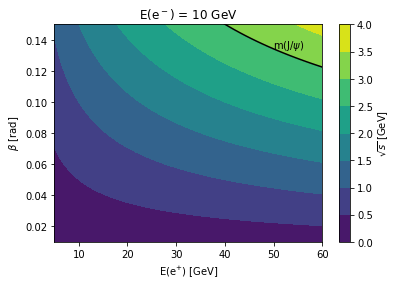

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

EPlusG, betaG = meshgrid(EPlus, beta)

for i, E_ in enumerate(EMinus):

    sqrtS = array([sqrt(s(E, E_, t)) for (E, t) in zip(EPlusG, betaG)]) ##[GeV]

    fig, ax = plt.subplots()
    ax.set_title(r"E(e$^{Q}$) = {E} GeV".format(Q="-", E=E_))
    ax.set_xlabel(r"E(e$^{+}$) [GeV]")
    ax.set_ylabel(r"$\beta$ [rad]")
    ax.set_ylim(beta[0], beta[-1])

    ax.plot(EPlus, resLine[i], color="black")
    ax.text(EPlus[40], resLine[i][40], r"m(J/$\psi)$")
    cs = ax.contourf(EPlusG, betaG, sqrtS)
    cb =fig.colorbar(cs, ax=ax)
    cb.set_label(r"$\sqrt{s}$ [GeV]")